In [1]:
import pandas as pd

In [2]:
df=pd.read_csv("car_price_dataset.csv")

Dataset Description: 

The Car Price Dataset contains 10,000 records with 10 attributes detailing used cars and their resale prices. It includes brand, model, year (2000–2023), engine size (1.0L–5.0L), fuel type, transmission, mileage, doors, owner count, and price ($2,000–$18,301). Newer cars, luxury brands, and lower mileage vehicles generally have higher prices. Automatic, diesel, and hybrid cars also tend to be more valuable. The dataset is ideal for price prediction models and market analysis, revealing trends such as depreciation patterns and the rising popularity of hybrid and electric vehicles due to environmental concerns.

Columns in dataset: 

* Brand (object): The car manufacturer (e.g., Kia, Chevrolet, Mercedes, Audi, etc.).
* Model (object): The specific model of the car.
* Year (int64): The manufacturing year of the car (range: 2000 to 2023).
* Engine_Size (float64): The size of the engine in liters (range: 1.0L to 5.0L).
* Fuel_Type (object): The type of fuel used (e.g., Diesel, Hybrid, Electric).
* Transmission (object): The type of transmission (e.g., Manual, Automatic, Semi-Automatic).
* Mileage (int64): The total distance the car has traveled, in kilometers (range: 25 to 299,947).
* Doors (int64): The number of doors (range: 2 to 5).
* Owner_Count (int64): The number of previous owners (range: 1 to 5).
* Price (int64): The selling price of the car in USD (range: $2,000 to $18,301)

In [3]:
df

,Brand,Model,Year,Engine_Size,Fuel_Type,Transmission,Mileage,Doors,Owner_Count,Price
0,Kia,Rio,2020,4.2,Diesel,Manual,289944,3,5,8501
1,Chevrolet,Malibu,2012,2.0,Hybrid,Automatic,5356,2,3,12092
2,Mercedes,GLA,2020,4.2,Diesel,Automatic,231440,4,2,11171
3,Audi,Q5,2023,2.0,Electric,Manual,160971,2,1,11780
4,Volkswagen,Golf,2003,2.6,Hybrid,Semi-Automatic,286618,3,3,2867
...,...,...,...,...,...,...,...,...,...,...
9995,Kia,Optima,2004,3.7,Diesel,Semi-Automatic,5794,2,4,8884
9996,Chevrolet,Impala,2002,1.4,Electric,Automatic,168000,2,1,6240
9997,BMW,3 Series,2010,3.0,Petrol,Automatic,86664,5,1,9866
9998,Ford,Explorer,2002,1.4,Hybrid,Automatic,225772,4,1,4084


In [4]:
df.isnull().sum()

Brand           0
Model           0
Year            0
Engine_Size     0
Fuel_Type       0
Transmission    0
Mileage         0
Doors           0
Owner_Count     0
Price           0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Brand         10000 non-null  object 
 1   Model         10000 non-null  object 
 2   Year          10000 non-null  int64  
 3   Engine_Size   10000 non-null  float64
 4   Fuel_Type     10000 non-null  object 
 5   Transmission  10000 non-null  object 
 6   Mileage       10000 non-null  int64  
 7   Doors         10000 non-null  int64  
 8   Owner_Count   10000 non-null  int64  
 9   Price         10000 non-null  int64  
dtypes: float64(1), int64(5), object(4)
memory usage: 781.4+ KB


In [6]:
from sklearn.linear_model import LinearRegression
from sklearn import linear_model

In [7]:
brand=pd.get_dummies(df['Brand'],prefix="Brand")

In [8]:
model=pd.get_dummies(df['Model'],prefix="Model")

In [9]:
fuel_type=pd.get_dummies(df['Fuel_Type'],prefix="Fuel_Type")

In [10]:
transmission=pd.get_dummies(df['Transmission'],prefix="Transmission")

In [11]:
print(brand)

      Brand_Audi  Brand_BMW  Brand_Chevrolet  Brand_Ford  Brand_Honda  \
0              0          0                0           0            0   
1              0          0                1           0            0   
2              0          0                0           0            0   
3              1          0                0           0            0   
4              0          0                0           0            0   
...          ...        ...              ...         ...          ...   
9995           0          0                0           0            0   
9996           0          0                1           0            0   
9997           0          1                0           0            0   
9998           0          0                0           1            0   
9999           0          0                0           0            0   

      Brand_Hyundai  Brand_Kia  Brand_Mercedes  Brand_Toyota  Brand_Volkswagen  
0                 0          1            

In [31]:
print(model)

      Model_3 Series  Model_5 Series  Model_A3  Model_A4  Model_Accord  \
0                  0               0         0         0             0   
1                  0               0         0         0             0   
2                  0               0         0         0             0   
3                  0               0         0         0             0   
4                  0               0         0         0             0   
...              ...             ...       ...       ...           ...   
9995               0               0         0         0             0   
9996               0               0         0         0             0   
9997               1               0         0         0             0   
9998               0               0         0         0             0   
9999               0               0         0         0             0   

      Model_C-Class  Model_CR-V  Model_Camry  Model_Civic  Model_Corolla  ...  \
0                 0           

In [32]:
print(transmission)

      Transmission_Automatic  Transmission_Manual  Transmission_Semi-Automatic
0                          0                    1                            0
1                          1                    0                            0
2                          1                    0                            0
3                          0                    1                            0
4                          0                    0                            1
...                      ...                  ...                          ...
9995                       0                    0                            1
9996                       1                    0                            0
9997                       1                    0                            0
9998                       1                    0                            0
9999                       0                    1                            0

[10000 rows x 3 columns]


In [33]:
print(fuel_type)

      Fuel_Type_Diesel  Fuel_Type_Electric  Fuel_Type_Hybrid  Fuel_Type_Petrol
0                    1                   0                 0                 0
1                    0                   0                 1                 0
2                    1                   0                 0                 0
3                    0                   1                 0                 0
4                    0                   0                 1                 0
...                ...                 ...               ...               ...
9995                 1                   0                 0                 0
9996                 0                   1                 0                 0
9997                 0                   0                 0                 1
9998                 0                   0                 1                 0
9999                 1                   0                 0                 0

[10000 rows x 4 columns]


In [12]:
df.drop(["Brand","Model","Fuel_Type","Transmission"],axis=1,inplace=True)

In [13]:
df=pd.concat([df,brand,model,fuel_type,transmission],axis=1)

In [14]:
reg=linear_model.LinearRegression()
reg.fit(df.drop('Price',axis='columns'),df.Price)

LinearRegression()

In [15]:
reg.coef_

array([ 2.98601356e+02,  9.92739311e+02, -1.98902438e-02, -5.50438929e-01,
        3.58753186e-02,  7.93782169e+06,  8.57264060e+07,  2.99605041e+07,
        4.77730782e+07,  2.42916951e+07,  5.56343367e+07,  3.62589034e+07,
       -3.36718271e+07,  6.81668214e+07,  5.85635755e+07, -3.67501191e+07,
       -3.67501262e+07,  4.10384639e+07,  4.10384596e+07,  2.46845954e+07,
        8.26481159e+07,  2.46845951e+07, -1.91905400e+07,  2.46846025e+07,
       -1.91905371e+07,  8.26481131e+07, -6.65805335e+06,  1.90157787e+07,
        1.20320956e+06,  1.20320731e+06,  1.20321048e+06,  8.26481228e+07,
       -9.58729061e+06,  1.90157836e+07,  1.90157816e+07,  1.27173897e+07,
       -9.58728978e+06,  4.10384618e+07, -1.91905291e+07,  1.27173897e+07,
       -6.65805214e+06,  1.27173903e+07, -9.58729063e+06, -6.65804953e+06,
       -3.67501138e+07, -1.07369880e+07, -1.07350001e+07, -1.07359977e+07,
       -1.07369869e+07, -1.79773965e+07, -1.79788868e+07, -1.79788885e+07])

In [16]:
reg.intercept_

-20853476.676488727

In [17]:
df

,Year,Engine_Size,Mileage,Doors,Owner_Count,Price,Brand_Audi,Brand_BMW,Brand_Chevrolet,Brand_Ford,...,Model_Tiguan,Model_Tucson,Model_X5,Fuel_Type_Diesel,Fuel_Type_Electric,Fuel_Type_Hybrid,Fuel_Type_Petrol,Transmission_Automatic,Transmission_Manual,Transmission_Semi-Automatic
0,2020,4.2,289944,3,5,8501,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
1,2012,2.0,5356,2,3,12092,0,0,1,0,...,0,0,0,0,0,1,0,1,0,0
2,2020,4.2,231440,4,2,11171,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
3,2023,2.0,160971,2,1,11780,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
4,2003,2.6,286618,3,3,2867,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,2004,3.7,5794,2,4,8884,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
9996,2002,1.4,168000,2,1,6240,0,0,1,0,...,0,0,0,0,1,0,0,1,0,0
9997,2010,3.0,86664,5,1,9866,0,1,0,0,...,0,0,0,0,0,0,1,1,0,0
9998,2002,1.4,225772,4,1,4084,0,0,0,1,...,0,0,0,0,0,1,0,1,0,0


In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
plt.figure(figsize=(15, 10))

<Figure size 1500x1000 with 0 Axes>

<Figure size 1500x1000 with 0 Axes>

Text(0.5, 1.0, 'Distribution of Car Prices')

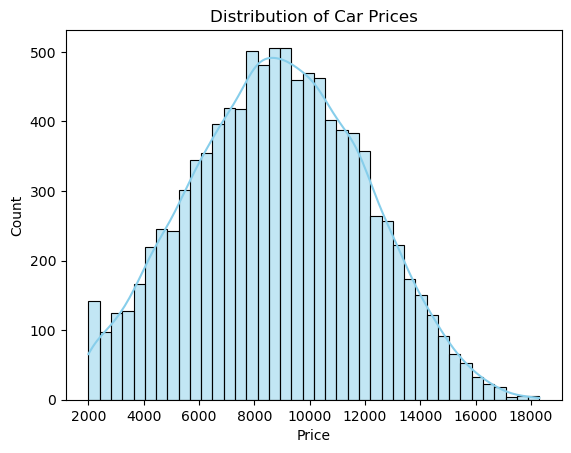

In [20]:
sns.histplot(df['Price'], kde=True, color='skyblue')
plt.title('Distribution of Car Prices')

C:\Users\khsbh\AppData\Local\Temp\ipykernel_96316\28750575.py:1: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x='Engine_Size', y='Price', data=df, palette='viridis')


Text(0.5, 1.0, 'Engine Size vs. Price')

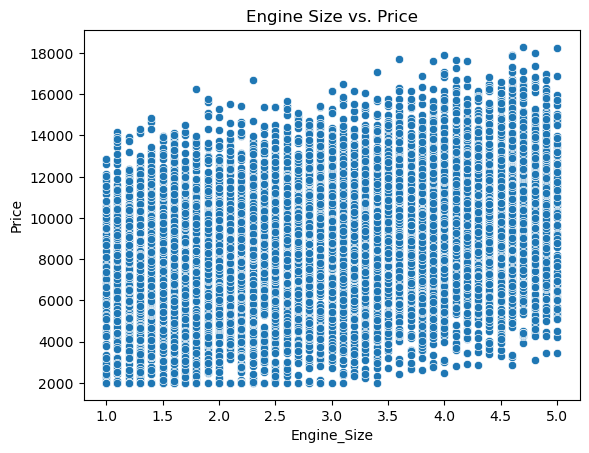

In [21]:
sns.scatterplot(x='Engine_Size', y='Price', data=df, palette='viridis')
plt.title('Engine Size vs. Price')

Text(0.5, 1.0, 'Car Year vs. Price')

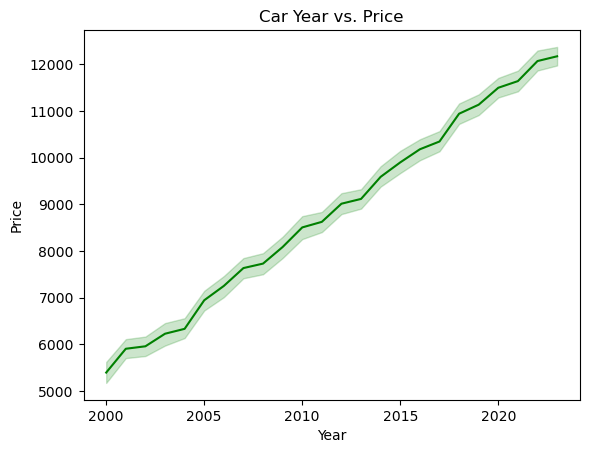

In [22]:
sns.lineplot(x='Year', y='Price', data=df, color='green')
plt.title('Car Year vs. Price')

Text(0.5, 1.0, 'Mileage vs. Price')

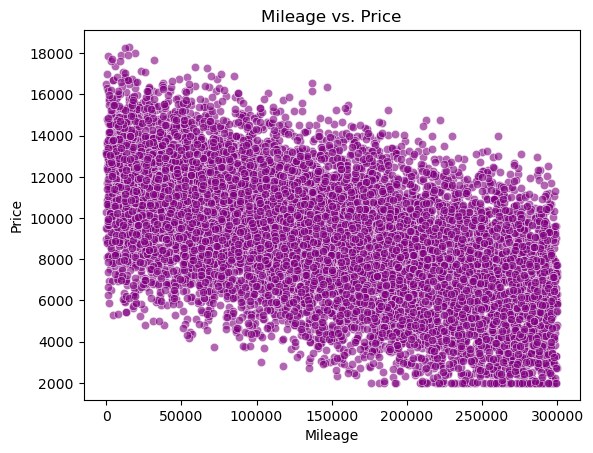

In [23]:
sns.scatterplot(x='Mileage', y='Price', data=df, color='purple', alpha=0.6)
plt.title('Mileage vs. Price')


Text(0.5, 1.0, 'Owner Count vs. Price')

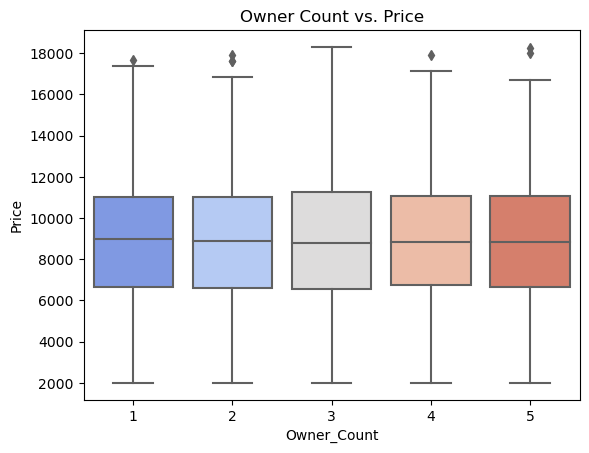

In [24]:
sns.boxplot(x='Owner_Count', y='Price', data=df, palette='coolwarm')
plt.title('Owner Count vs. Price')

Text(0.5, 1.0, 'Number of Doors Distribution')

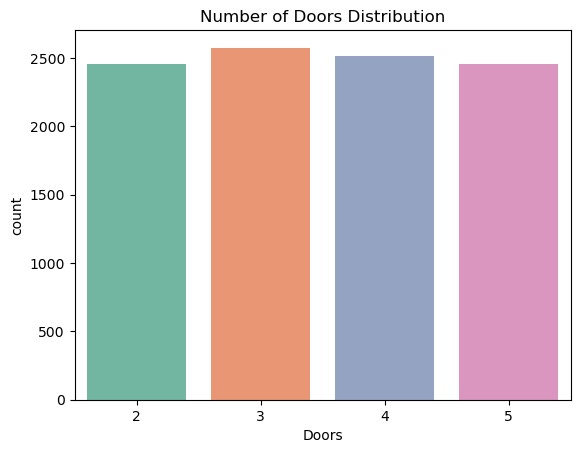

In [25]:
sns.countplot(x='Doors', data=df, palette='Set2')
plt.title('Number of Doors Distribution')

Text(0.5, 1.0, 'Year-wise Car Count')

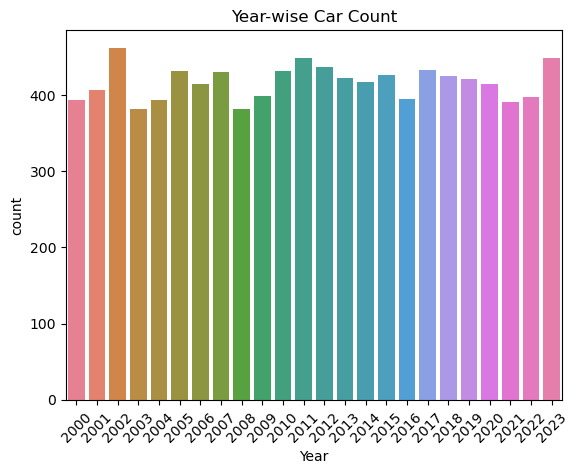

In [26]:
sns.countplot(x='Year', data=df, palette='husl')
plt.xticks(rotation=45)
plt.title('Year-wise Car Count')

Text(0.5, 1.0, 'Correlation Heatmap')

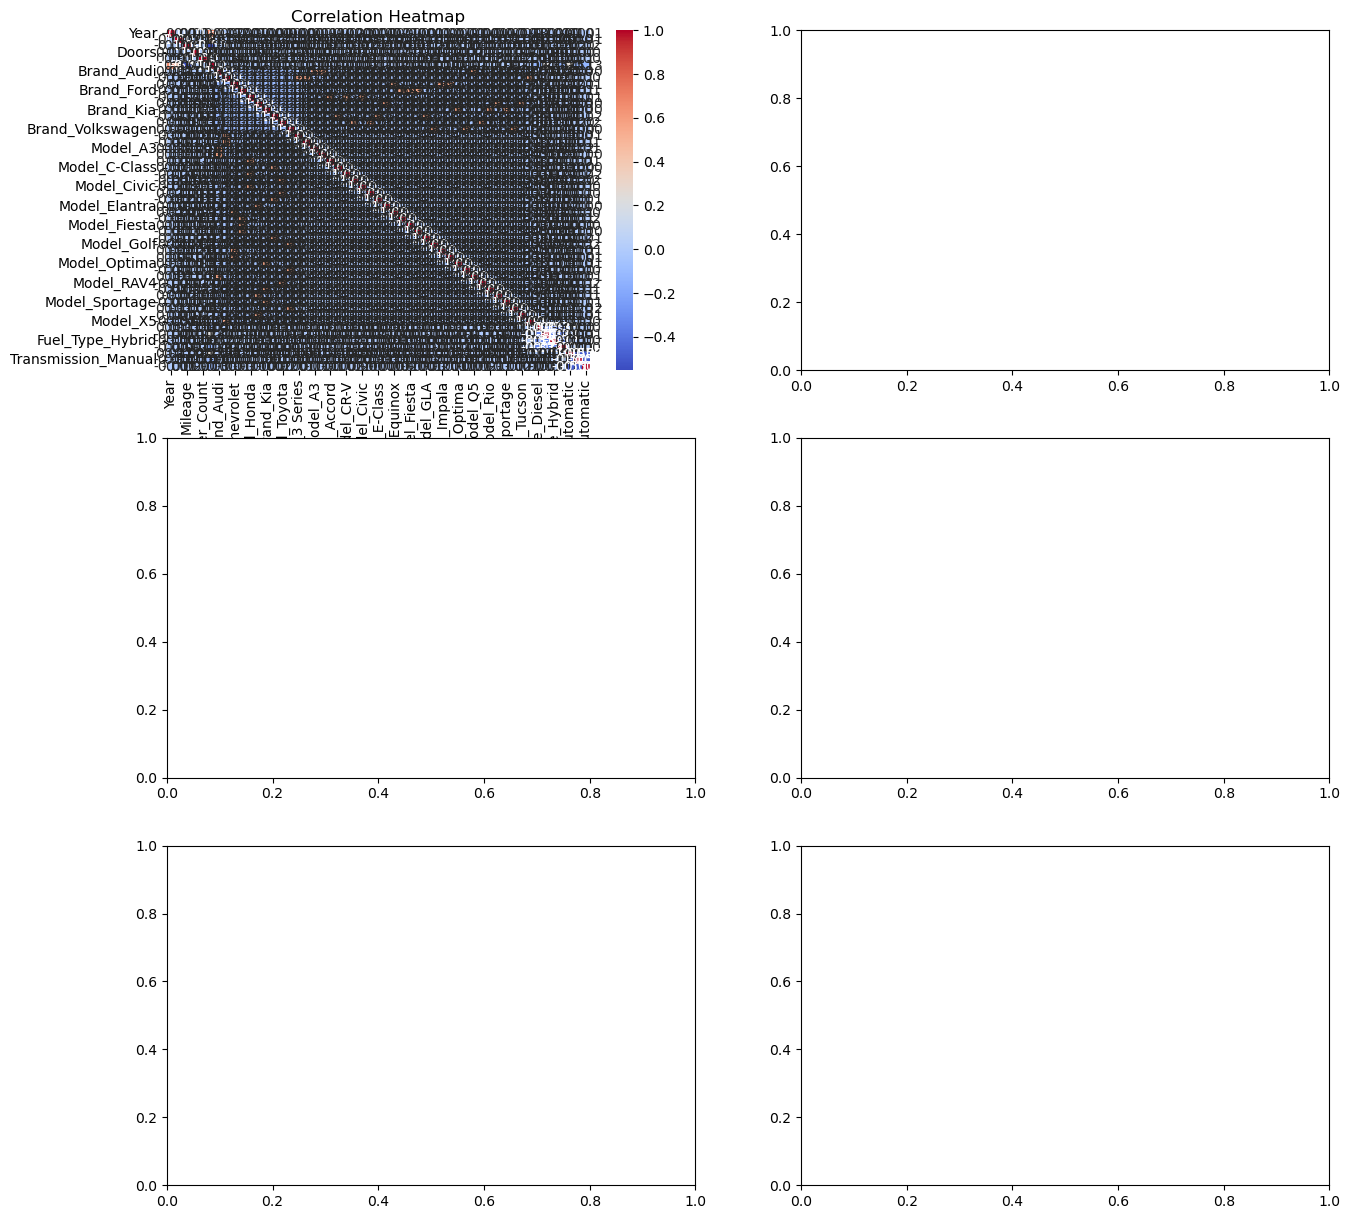

In [27]:
fig, axes = plt.subplots(3, 2, figsize=(15, 15))
axes = axes.flatten()
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', ax=axes[0])
axes[0].set_title('Correlation Heatmap')

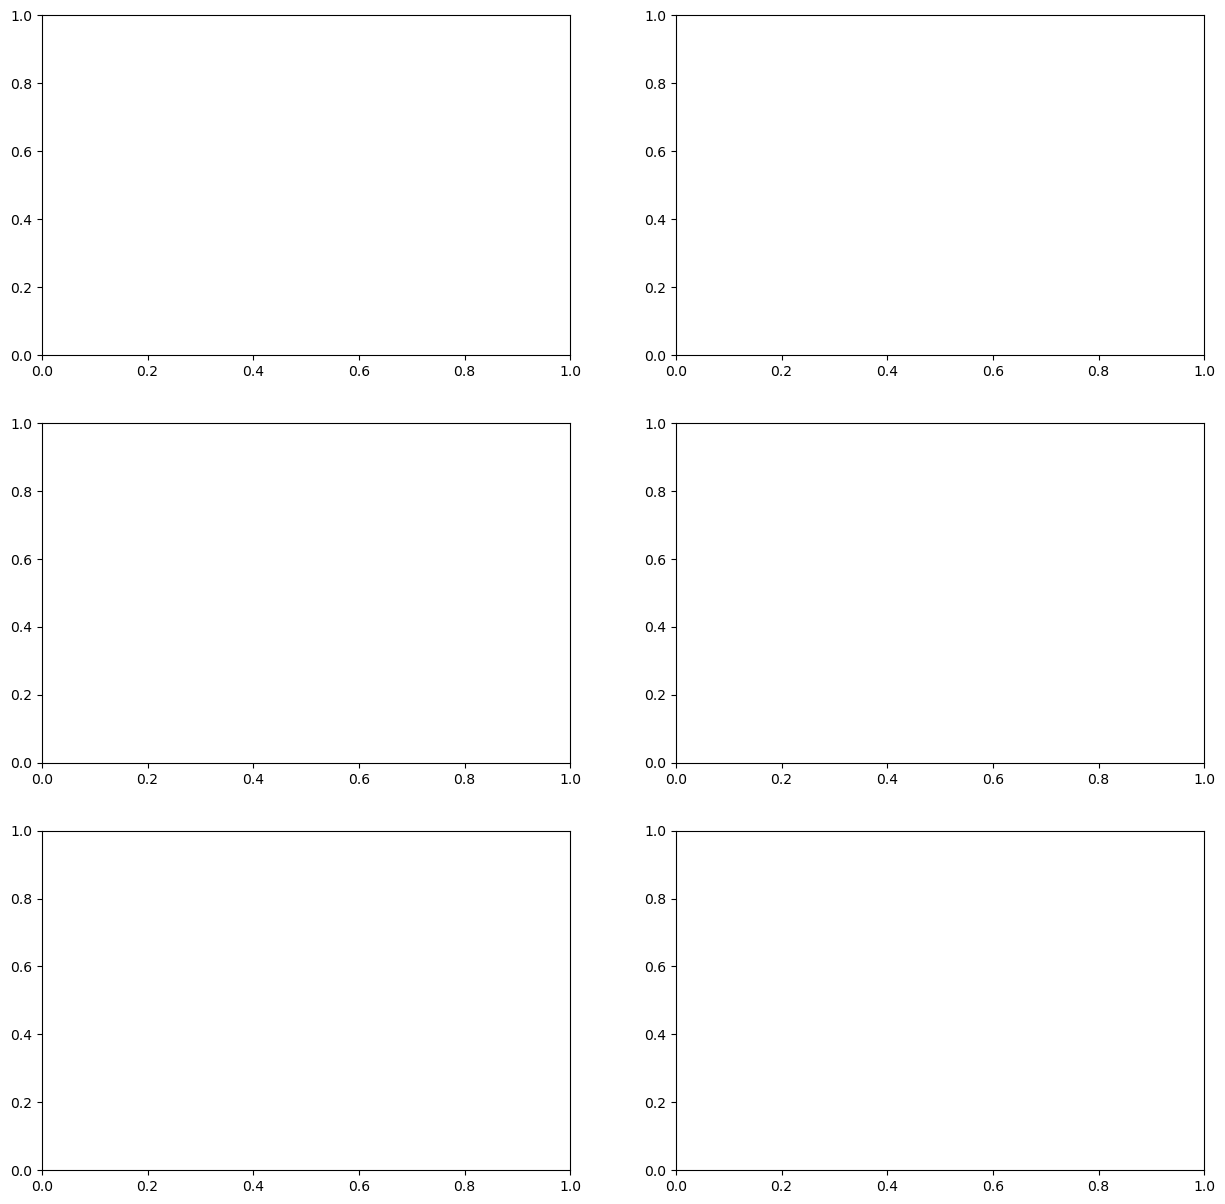

In [28]:
fig, axes = plt.subplots(3, 2, figsize=(15, 15))
axes = axes.flatten()

Text(0.5, 1.0, 'Distribution of Engine Sizes')

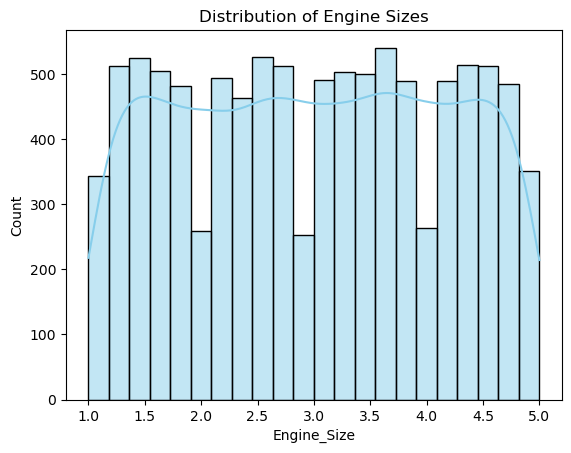

In [29]:
sns.histplot(df['Engine_Size'], kde=True, color='skyblue')
plt.title('Distribution of Engine Sizes')

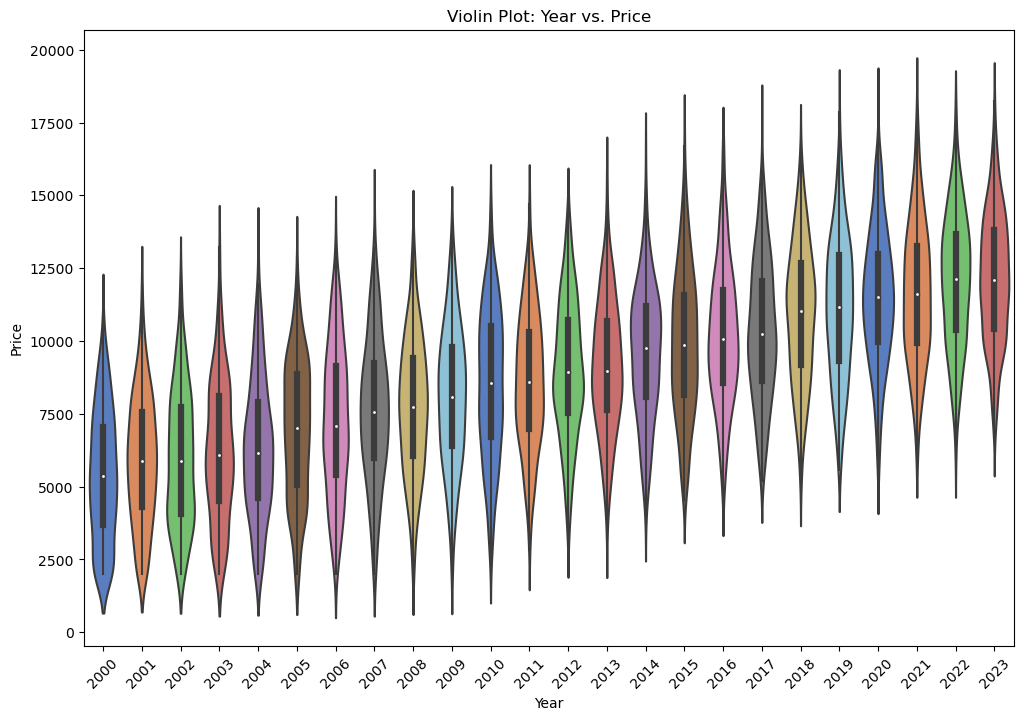

In [30]:
plt.figure(figsize=(12, 8))
sns.violinplot(x='Year', y='Price', data=df, palette='muted')
plt.title('Violin Plot: Year vs. Price')
plt.xticks(rotation=45)
plt.show()


DataSet Observation:
Insights from the Car Price Dataset Visualizations
1. Price Trends by Year
    * The Price vs. Year scatter plot and violin plot reveal that newer cars (post-2015) have significantly higher prices, while       older models tend to be cheaper.
    * The median price steadily increases for recent cars, reflecting their higher market value.
2. Mileage and Price Relationship
    * The Mileage vs. Price scatter plot highlights a clear trend:
    * Cars with higher mileage tend to have lower prices, reflecting wear and depreciation.
    * Lower-mileage cars retain their value better, especially newer models.
3. Engine Size Impact
    * The Engine Size vs. Price and Engine Size vs. Mileage scatter plots show that:
    * Cars with larger engines generally have higher prices, indicating more powerful and premium vehicles.
    * Larger engines tend to have lower mileage, suggesting they may be used less frequently or preserved for special purposes.
4. Doors and Pricing
    The Price Distribution by Number of Doors plot shows that:
    * 4-door cars dominate the market and have the widest price range, likely due to their popularity and versatility.
    * 2-door cars are generally priced lower, possibly because they are less practical for families.
    * 5-door cars exhibit moderate pricing, often associated with hatchbacks or compact SUVs.
5. Ownership Patterns
    The Owner Count vs. Price plot reveals that:
    * Cars with fewer previous owners generally have higher prices, as they are perceived to be better maintained.
    * Cars with 3 or more owners tend to have lower prices, likely due to increased wear and potential maintenance issues.
6. Fuel Type and Transmission Insights
    From the earlier plots (which included fuel and transmission types):
    * Hybrid and electric cars have higher prices, reflecting their growing demand and eco-friendliness.
    * Automatic cars generally have higher resale values compared to manual cars, indicating a consumer preference for                 convenience.
7. Yearly Car Trends
    The Year vs. Number of Doors and Year-wise Car Count plots show that:
    * The production of cars peaked between 2015 and 2020, indicating higher availability of newer cars in the dataset.
    * Most recent cars are 4-door models, reflecting their practicality and market preference.